# Diamond Price Analysis

This notebook provides a comprehensive analysis of the diamond dataset, including:
- Data preview
- Data types and summary statistics
- Distribution of categorical and numerical features
- Outlier detection
- Next steps for modeling.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

In [8]:
# Load the dataset
df = pd.read_csv(r'/Users/danieltana/Downloads/exampy.py/csv.csv')
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe(include='all')

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [5]:
df.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

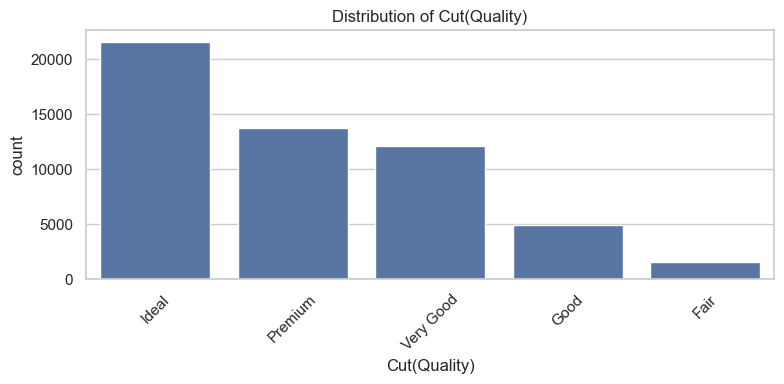

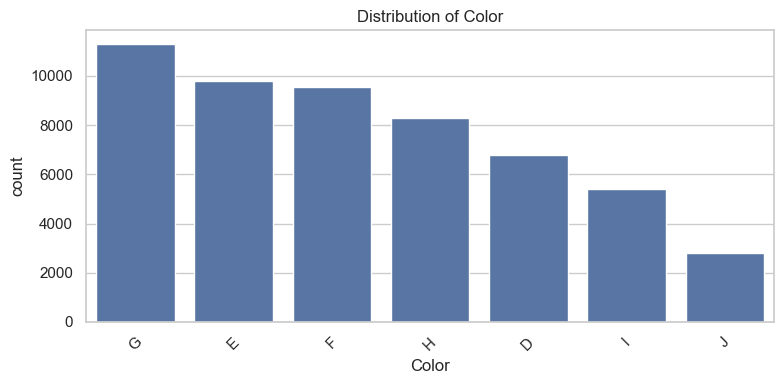

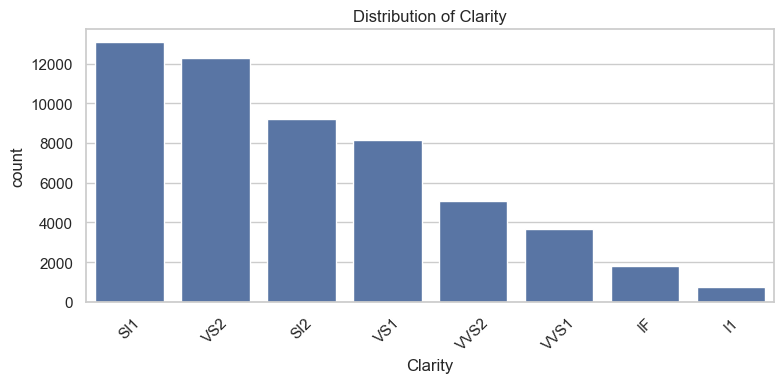

In [6]:
# Plot distributions of categorical columns
categorical_cols = ['Cut(Quality)', 'Color', 'Clarity']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Distribution of Categorical Columns :
These plots show the frequency of each category for three categorical features: Cut, Color, and Clarity.

Cut(Quality):

Bar chart showing frequency of each cut type (e.g., Ideal, Premium, Good, Very Good, Fair).

Observation: "Ideal" is the most common cut.

Color:

Bar chart displaying counts of each diamond color grade (from D to J).

Observation: Color G appears most frequently.

Clarity:

Bar chart indicating how many diamonds fall into each clarity category (e.g., SI1, VS2).

Observation: SI1 is the most common clarity.

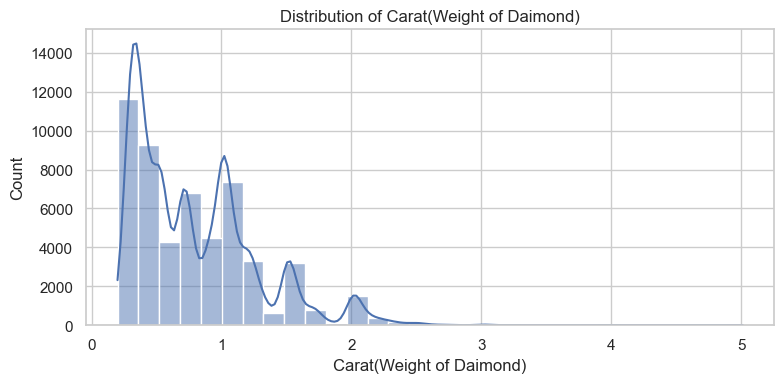

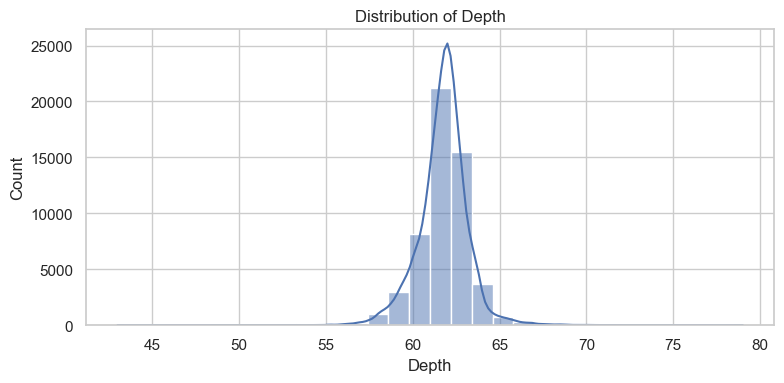

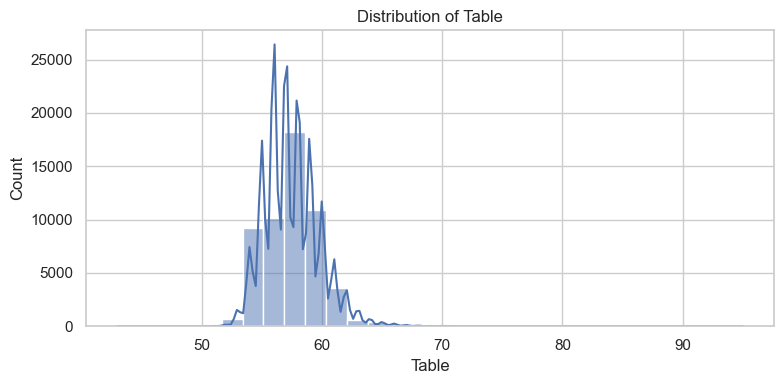

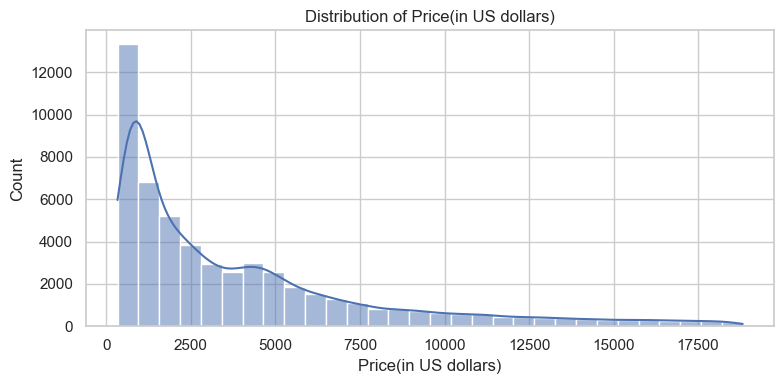

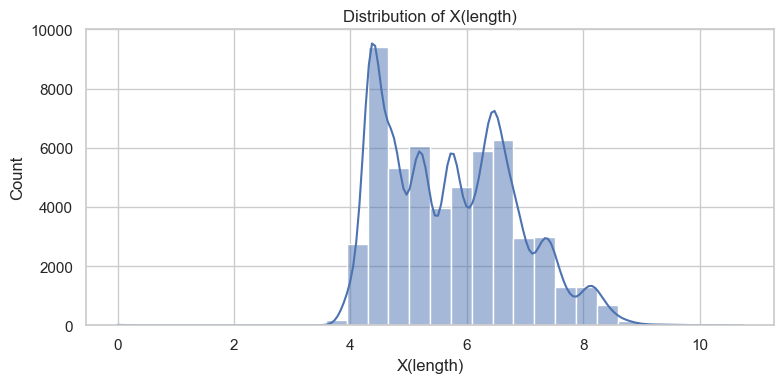

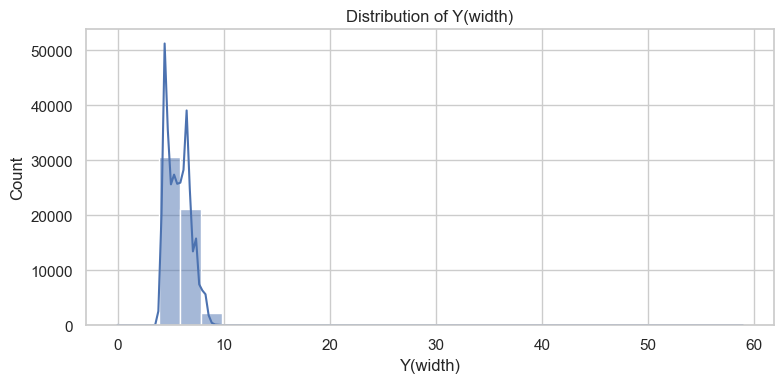

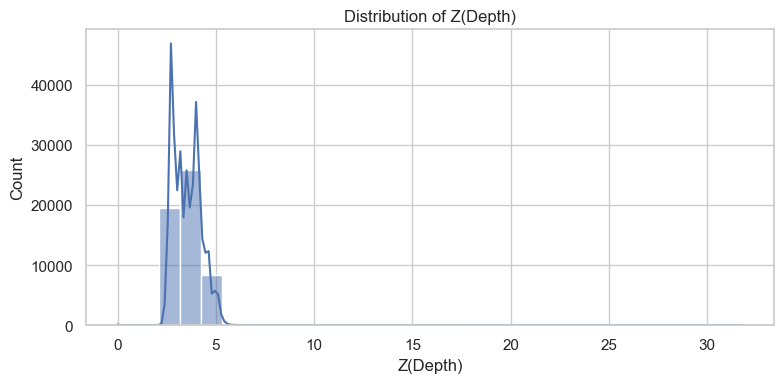

In [8]:
# Plot distributions of numerical columns
numerical_cols = ['Carat(Weight of Daimond)', 'Depth', 'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

Distribution of Numerical Columns :
These are histogram plots with KDE (Kernel Density Estimation) overlays, used to show distribution shape for each numerical variable.

Carat (Weight of Diamond):

Right-skewed distribution; most diamonds weigh less than 1 carat.

Depth:

Fairly normal distribution centered around ~61.7%, but with some outliers.

Table:

Mostly centered between 54 and 60; relatively symmetric but with a few extreme values.

Price (in US dollars):

Right-skewed; most diamonds are under $5,000, with a long tail extending toward $18,000+.

X (Length), Y (Width), Z (Depth):

All show some skewness and have outliers.

Notably, there are some zeros which are physically implausible (addressed later in data cleaning).



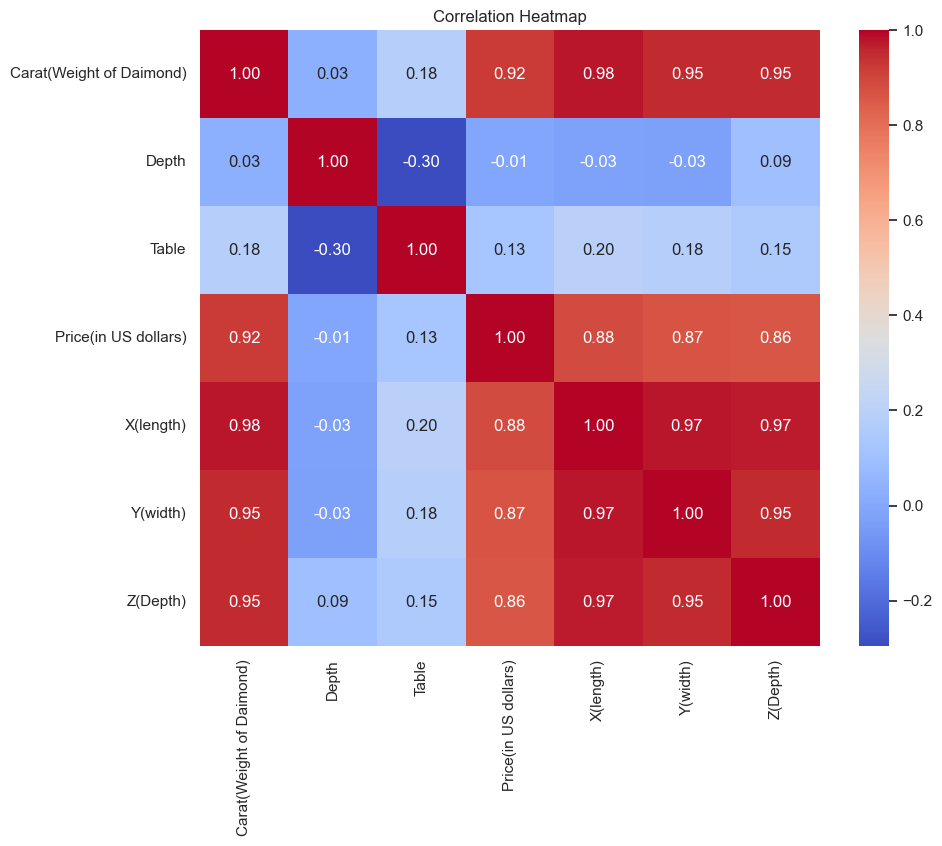

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Correlation Heatmap :
A heatmap showing Pearson correlation coefficients between all numerical features.

Key Insights:

Carat has the highest positive correlation with Price (~0.92).

Dimensions (X, Y, Z) also correlate with Price, though slightly less.

Depth and Table show weak or no correlation with Price.



In [10]:
# Check for zero values in dimensions
zero_x = df[df['X(length)'] == 0]
zero_y = df[df['Y(width)'] == 0]
zero_z = df[df['Z(Depth)'] == 0]

print(f'Rows with zero X: {len(zero_x)}')
print(f'Rows with zero Y: {len(zero_y)}')
print(f'Rows with zero Z: {len(zero_z)}')

Rows with zero X: 8
Rows with zero Y: 7
Rows with zero Z: 20


Zero Value Check in Dimensions :
Not a plot, but a printed output:

X(length) = 0 in 8 rows

Y(width) = 0 in 7 rows

Z(depth) = 0 in 20 rows